# Description
In my analysis I will be exploring which of the two of Polish cities Cracow and Warsaw might be better to open a Cocktail Bar in. Warsaw is a modern capital of Poland however Cracow is known as a historic capital with a lot of charm. Two cities have different character however both have old town, both attract tourists and both are large enough to generate footfall form local population. I’m interested to learn which of these cities would be better to base Cocktail Bar in. In order to maximise the success of the venue it would be beneficial to base it close to attractions and old town, therefore I’m also interested whether it might be a good idea to base Cocktail Bar close to old town.

# Methodolodgy
I’ll use statistics such as population, GPD, total number of tourist visiting available on Wikipedia and PWC reports published online. This data would give me generic picture of the city and its potential. From this data I will get a view of weather I can expect profits to be driven by local population or tourists and how busy the city is and which city has population which is more likely to have a spare cash to spend on entertainment. This data will help me determine which city has potentially better suited audience for venue I’m planning to open.
To evaluate location of Cocktail bar I will use data available on Foursquare. I will lookup venues within 10k of old town coordinates for each city. I will first search for Cocktail Cars to see how saturated the market is in general and then I’ll explore how many bars there is in the same proximity to old town. By searching bars I would like to know how many venues serving alcohol I’ll be competing against. 


# Import packages

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


Solving environment: ...working... done

# All requested packages already installed.



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


Folium installed
Libraries imported.


# Get data for generic stats about locations

In [124]:
City_stats = pd.read_csv('war_crac.csv', encoding = "ISO-8859-1")
City_stats

,City,Population,GDP per capita ($),Tourists per year (mln),Foreign tourists per year (mln)
0,Warsaw,1777972,294,9.6,2.7
1,Cracow,771069,152,9.1,2.9


# Analyse information about the cities

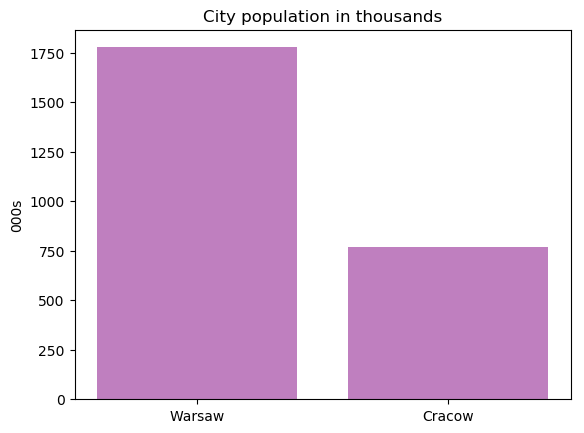

In [147]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

N=2
y_pos = np.arange(N)
performance = [1778, 771]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['#800080'])
plt.xticks(y_pos, objects)
plt.ylabel('000s')
plt.title('City population in thousands')

plt.show()

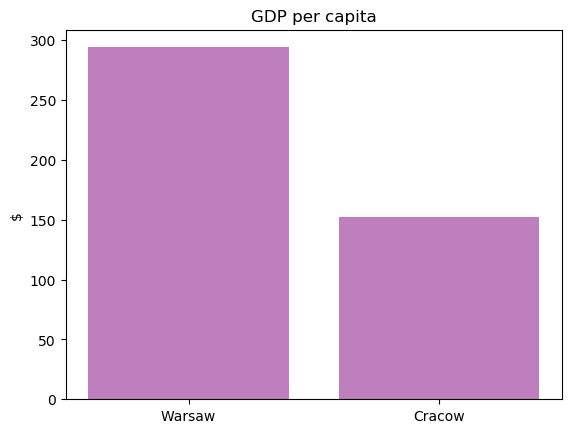

In [148]:
N=2
y_pos = np.arange(N)
performance = [294, 152]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['#800080'])
plt.xticks(y_pos, objects)
plt.ylabel('$')
plt.title('GDP per capita')

plt.show()

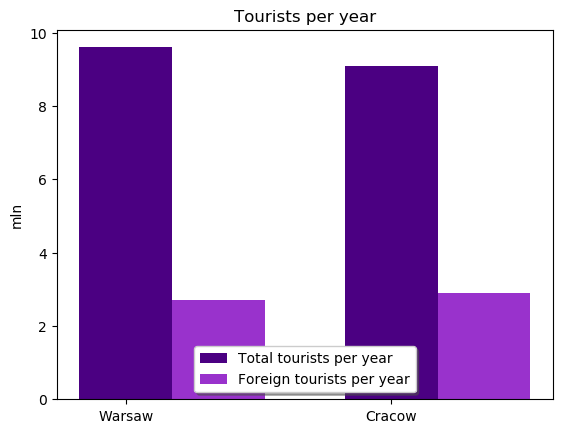

In [150]:
N=2
y_pos = np.arange(N)
performance1 = [9.6, 9.1]
performance2 = [2.7, 2.9]
width = 0.35 

plt.bar(y_pos, performance1, width, label='Total tourists per year',  color=['#4B0082'])
plt.bar(y_pos + width, performance2, width, label='Foreign tourists per year', color=['#9932CC'])
        
plt.xticks(y_pos, objects)
plt.ylabel('mln')
plt.title('Tourists per year')
#plt.legend()
plt.legend(loc='lower center', shadow=True)

plt.show()

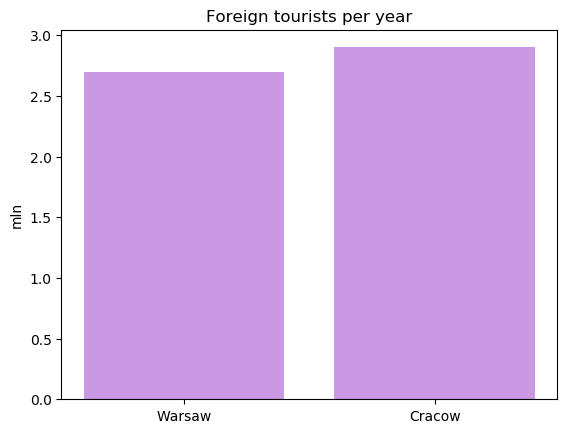

In [152]:
N=2
y_pos = np.arange(N)
performance = [2.7, 2.9]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['#9932CC'])
plt.xticks(y_pos, objects)
plt.ylabel('mln')
plt.title('Foreign tourists per year')

plt.show()

# Login details to query data from Foursquere

In [55]:
# set login to query data from Foursquere
CLIENT_ID = '5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR' # your Foursquare ID
CLIENT_SECRET = 'V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR
CLIENT_SECRET:V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO


# Warsaw: Analysis using Foursquere

# First part: search for places serving Coctails in Warsaw

In [77]:
# set parameters to use to get the data from foursquere
geolocator = Nominatim(user_agent="foursquare_agent")
latitude = 52.2477331
longitude = 21.0136079
search_query = 'Cocktail'
radius = 10000

In [78]:
# query the data from foursquere
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR&client_secret=V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO&ll=52.2477331,21.0136079&v=20180604&query=Cocktail&radius=10000&limit=1000000'

# Get json file of data from Foursquere and format it

In [79]:
#json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1349472081a2002b47c7b9'},
 'response': {'venues': [{'id': '57643a35498ea13a756ccbd3',
    'name': 'Si ristorante & cocktail bar',
    'location': {'lat': 52.24151080944112,
     'lng': 21.003822353160892,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.24151080944112,
       'lng': 21.003822353160892}],
     'distance': 961,
     'postalCode': '00-102',
     'cc': 'PL',
     'city': 'Warszawa',
     'state': 'Województwo mazowieckie',
     'country': 'Polska',
     'formattedAddress': ['00-102 Warszawa', 'Polska']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561545031',
    'hasPerk': False},
   {'id': '581e5aed6a80ef4d0de4f8cd',
    'name': 'Ritual Cocktail Club',

In [80]:
#write the results into the data frame
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,57643a35498ea13a756ccbd3,NaN,PL,Warszawa,Polska,NaN,961,"[00-102 Warszawa, Polska]","[{'label': 'display', 'lat': 52.24151080944112...",52.241511,21.003822,00-102,Województwo mazowieckie,Si ristorante & cocktail bar,v-1561545031
1,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",False,581e5aed6a80ef4d0de4f8cd,Mazowiecka 12,PL,Warszawa,Polska,NaN,1118,"[Mazowiecka 12, 00-048 Warszawa, Polska]","[{'label': 'display', 'lat': 52.23769399402742...",52.237694,21.013022,00-048,Województwo mazowieckie,Ritual Cocktail Club,v-1561545031
2,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",False,4e6cdafed1649db799ca24de,Grzybowska 2,PL,Warszawa,Polska,NaN,1354,"[Grzybowska 2, Warszawa, Polska]","[{'label': 'display', 'lat': 52.23769156957225...",52.237692,21.002391,NaN,Województwo mazowieckie,Duo Cafe & Cocktail Bar,v-1561545031
3,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4bd4331a9854d13a3b2eff4d,Nowy Świat 34,PL,Warszawa,Polska,NaN,1601,"[Nowy Świat 34, Warszawa, Polska]","[{'label': 'display', 'lat': 52.23375991906909...",52.233760,21.019213,NaN,Województwo mazowieckie,Cocktail Bar,v-1561545031
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5d0f43ff1feae30023a6cedf,48 Chłodna,PL,Warszawa,Polska,NaN,2285,"[48 Chłodna, 00-872 Warszawa, Polska]","[{'label': 'display', 'lat': 52.236872, 'lng':...",52.236872,20.985152,00-872,Województwo mazowieckie,Meating Room Cocktail Bar & Restaurant,v-1561545031


In [81]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Si ristorante & cocktail bar,Italian Restaurant,NaN,PL,Warszawa,Polska,NaN,961,"[00-102 Warszawa, Polska]","[{'label': 'display', 'lat': 52.24151080944112...",52.241511,21.003822,00-102,Województwo mazowieckie,57643a35498ea13a756ccbd3
1,Ritual Cocktail Club,Cocktail Bar,Mazowiecka 12,PL,Warszawa,Polska,NaN,1118,"[Mazowiecka 12, 00-048 Warszawa, Polska]","[{'label': 'display', 'lat': 52.23769399402742...",52.237694,21.013022,00-048,Województwo mazowieckie,581e5aed6a80ef4d0de4f8cd
2,Duo Cafe & Cocktail Bar,Bar,Grzybowska 2,PL,Warszawa,Polska,NaN,1354,"[Grzybowska 2, Warszawa, Polska]","[{'label': 'display', 'lat': 52.23769156957225...",52.237692,21.002391,NaN,Województwo mazowieckie,4e6cdafed1649db799ca24de
3,Cocktail Bar,Café,Nowy Świat 34,PL,Warszawa,Polska,NaN,1601,"[Nowy Świat 34, Warszawa, Polska]","[{'label': 'display', 'lat': 52.23375991906909...",52.233760,21.019213,NaN,Województwo mazowieckie,4bd4331a9854d13a3b2eff4d
4,Meating Room Cocktail Bar & Restaurant,Restaurant,48 Chłodna,PL,Warszawa,Polska,NaN,2285,"[48 Chłodna, 00-872 Warszawa, Polska]","[{'label': 'display', 'lat': 52.236872, 'lng':...",52.236872,20.985152,00-872,Województwo mazowieckie,5d0f43ff1feae30023a6cedf
5,Charlotte. Chleb i Wino,Café,al. Wyzwolenia 18,PL,Warszawa,Polska,pl. Zbawiciela,3112,"[al. Wyzwolenia 18 (pl. Zbawiciela), 00-570 Wa...","[{'label': 'display', 'lat': 52.21990825930722...",52.219908,21.018120,00-570,Województwo mazowieckie,4db80725815445bd47ca0b72
6,Mish Mash Cocktail & Food,Restaurant,NaN,PL,Warsaw,Polska,NaN,2735,"[00-680 Warsaw, Polska]","[{'label': 'display', 'lat': 52.223163, 'lng':...",52.223163,21.012850,00-680,Masovian,5a833f3bb25fee790a82e8e8
7,Marsz na Cocktail,Cocktail Bar,Marszałkowska 6,PL,Warszawa,Polska,NaN,3722,"[Marszałkowska 6, Warszawa, Polska]","[{'label': 'display', 'lat': 52.21458941726869...",52.214589,21.020901,NaN,Województwo mazowieckie,53c68e73498e3c9a5c98bb8a
8,Cocktail'me fashion jewellery,Jewelry Store,Mokotowska 52A,PL,Warsaw,Polska,btwn Wilcza & Piękna,2500,"[Mokotowska 52A (btwn Wilcza & Piękna), 00-543...","[{'label': 'display', 'lat': 52.22589359501906...",52.225894,21.022167,00-543,Masovian Voivodship,521bb471bce69ad395ba4e51
9,Cocktail'me,Jewelry Store,Mokotowska 52A,PL,Warszawa,Polska,btwn Wilcza & Piękna,2507,"[Mokotowska 52A (btwn Wilcza & Piękna), Warsza...","[{'label': 'display', 'lat': 52.22580815962031...",52.225808,21.022071,NaN,Województwo mazowieckie,521bb2babce69ad395b9c863


In [82]:
dataframe_filtered.name

0               Si ristorante & cocktail bar
1                       Ritual Cocktail Club
2                    Duo Cafe & Cocktail Bar
3                               Cocktail Bar
4     Meating Room Cocktail Bar & Restaurant
5                    Charlotte. Chleb i Wino
6                  Mish Mash Cocktail & Food
7                          Marsz na Cocktail
8              Cocktail'me fashion jewellery
9                                Cocktail'me
10              Coctail Bar Max & Dom Whisky
11                               6 cocktails
Name: name, dtype: object

# Display the data on the map

In [83]:
# create map of the venues withn 5000 radius of chosen latitude and longitude
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Chosen neighbourhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

# Second part: search for bars in Warsaw

In [160]:
# set parameters to use to get the data from foursquere
geolocator = Nominatim(user_agent="foursquare_agent")
latitude = 52.2477331
longitude = 21.0136079
search_query = 'bar'
radius = 10000

In [161]:
# query the data from foursquere
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR&client_secret=V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO&ll=52.2477331,21.0136079&v=20180604&query=bar&radius=10000&limit=1000000'

# Get json file of data from Foursquere and format it

In [162]:
#json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d13878bdbde110025a462c3'},
 'response': {'venues': [{'id': '55c4dc56498e1fc7b08b6802',
    'name': 'Bar and Books Podwale',
    'location': {'address': 'Wąski Dunaj 20',
     'crossStreet': 'Podwale',
     'lat': 52.24911460926389,
     'lng': 21.009715026961477,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.24911460926389,
       'lng': 21.009715026961477}],
     'distance': 306,
     'postalCode': '00-256',
     'cc': 'PL',
     'city': 'Warszawa',
     'state': 'Województwo mazowieckie',
     'country': 'Polska',
     'formattedAddress': ['Wąski Dunaj 20 (Podwale)',
      '00-256 Warszawa',
      'Polska']},
    'categories': [{'id': '4bf58dd8d48988d121941735',
      'name': 'Lounge',
      'pluralName': 'Lounges',
      'shortName': 'Lounge',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561560971',
    'hasPerk': Fal

In [163]:
#write the results into the data frame
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",False,55c4dc56498e1fc7b08b6802,Wąski Dunaj 20,PL,Warszawa,Polska,Podwale,306,"[Wąski Dunaj 20 (Podwale), 00-256 Warszawa, Po...","[{'label': 'display', 'lat': 52.24911460926389...",52.249115,21.009715,NaN,00-256,Województwo mazowieckie,Bar and Books Podwale,v-1561560971,NaN
1,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",False,4bd2049141b9ef3b9c24fde5,Krakowskie Przedmieście 42/44,PL,Warszawa,Polska,NaN,652,"[Krakowskie Przedmieście 42/44, Warszawa, Polska]","[{'label': 'display', 'lat': 52.24199290339249...",52.241993,21.015562,NaN,NaN,Województwo mazowieckie,Bristol Wine Bar,v-1561560971,NaN
2,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",False,4e8302fa9adffc58a7195e56,NaN,PL,NaN,Polska,NaN,1209,[Polska],"[{'label': 'display', 'lat': 52.25267526729001...",52.252675,20.997799,NaN,NaN,NaN,"Bar Mleczny ""Gdański""",v-1561560971,NaN
3,"[{'id': '4bf58dd8d48988d109941735', 'name': 'E...",False,4fb00292e4b097c37ed928c2,Krakowskie Przedmieście 79,PL,Warszawa,Polska,Miodowa,167,"[Krakowskie Przedmieście 79 (Miodowa), 00-079 ...","[{'label': 'display', 'lat': 52.24623464949226...",52.246235,21.013377,NaN,00-079,Województwo mazowieckie,Warszawa Bar & Restauracja,v-1561560971,NaN
4,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,4bd9d3aa2e6f0f4779290c08,"Nowy Świat 22/28, pawilon 21",PL,Warszawa,Polska,Foksal,1689,"[Nowy Świat 22/28, pawilon 21 (Foksal), Warsza...","[{'label': 'display', 'lat': 52.23314220898594...",52.233142,21.020421,NaN,NaN,Województwo mazowieckie,Bar Cô Tú,v-1561560971,NaN


In [164]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Bar and Books Podwale,Lounge,Wąski Dunaj 20,PL,Warszawa,Polska,Podwale,306,"[Wąski Dunaj 20 (Podwale), 00-256 Warszawa, Po...","[{'label': 'display', 'lat': 52.24911460926389...",52.249115,21.009715,NaN,00-256,Województwo mazowieckie,55c4dc56498e1fc7b08b6802
1,Bristol Wine Bar,Wine Bar,Krakowskie Przedmieście 42/44,PL,Warszawa,Polska,NaN,652,"[Krakowskie Przedmieście 42/44, Warszawa, Polska]","[{'label': 'display', 'lat': 52.24199290339249...",52.241993,21.015562,NaN,NaN,Województwo mazowieckie,4bd2049141b9ef3b9c24fde5
2,"Bar Mleczny ""Gdański""",Diner,NaN,PL,NaN,Polska,NaN,1209,[Polska],"[{'label': 'display', 'lat': 52.25267526729001...",52.252675,20.997799,NaN,NaN,NaN,4e8302fa9adffc58a7195e56
3,Warszawa Bar & Restauracja,Eastern European Restaurant,Krakowskie Przedmieście 79,PL,Warszawa,Polska,Miodowa,167,"[Krakowskie Przedmieście 79 (Miodowa), 00-079 ...","[{'label': 'display', 'lat': 52.24623464949226...",52.246235,21.013377,NaN,00-079,Województwo mazowieckie,4fb00292e4b097c37ed928c2
4,Bar Cô Tú,Asian Restaurant,"Nowy Świat 22/28, pawilon 21",PL,Warszawa,Polska,Foksal,1689,"[Nowy Świat 22/28, pawilon 21 (Foksal), Warsza...","[{'label': 'display', 'lat': 52.23314220898594...",52.233142,21.020421,NaN,NaN,Województwo mazowieckie,4bd9d3aa2e6f0f4779290c08
5,Sol y Sombra Tapas Bar,Spanish Restaurant,Grzybowska 2/16,PL,Warszawa,Polska,Graniczna,1295,"[Grzybowska 2/16 (Graniczna), 00-131 Warszawa,...","[{'label': 'display', 'lat': 52.23812460715664...",52.238125,21.002888,NaN,00-131,Województwo mazowieckie,501a8027e4b0960fbbec39c5
6,Burger Bar/Pekin Express,Burger Joint,Krucza,PL,Warszawa,Polska,NaN,2043,"[Krucza, 00-525 Warszawa, Polska]","[{'label': 'display', 'lat': 52.22949278927287...",52.229493,21.017027,NaN,00-525,NaN,5650b08d498e376aab80c6d3
7,+One Bar,Hotel Bar,Ul. E. Plater 49,PL,Warszawa,Polska,Hotel InterContinental,1852,"[Ul. E. Plater 49 (Hotel InterContinental), Wa...","[{'label': 'display', 'lat': 52.23240843355881...",52.232408,21.003000,NaN,NaN,Województwo mazowieckie,4cc57693b2beb1f794ae224c
8,KIK Fit Bar,Gluten-free Restaurant,Szpitalna 5,PL,Warszawa,Polska,NaN,1638,"[Szpitalna 5, 00-031 Warszawa, Polska]","[{'label': 'display', 'lat': 52.23303474998015...",52.233035,21.014843,NaN,00-031,Województwo mazowieckie,55a68090498e0d0265e09d83
9,Shabby Chic Coffee Bar,Café,Piwna 20/26,PL,Warszawa,Polska,Royal Castle,137,"[Piwna 20/26 (Royal Castle), Warszawa, Polska]","[{'label': 'display', 'lat': 52.24867313349216...",52.248673,21.012302,NaN,NaN,Województwo mazowieckie,50bf8277e4b06e3ca7225aef


In [165]:
dataframe_filtered.name

0                           Bar and Books Podwale
1                                Bristol Wine Bar
2                           Bar Mleczny "Gdański"
3                      Warszawa Bar & Restauracja
4                                       Bar Cô Tú
5                          Sol y Sombra Tapas Bar
6                        Burger Bar/Pekin Express
7                                        +One Bar
8                                     KIK Fit Bar
9                          Shabby Chic Coffee Bar
10    Wine Bar Mielżyński (Stara Fabryka Koronek)
11                               City24 Grill&Bar
12                   Coctail Bar Max & Dom Whisky
13                                     Bar Studio
14                                 Bar Pod Iglica
15                               Panorama Sky Bar
16                            Bar Kawowy Murzynek
17              Bar Dla Wszystkich (Bar Kercelak)
18                            Bar Mleczny Syrenka
19                                   Bar u Dawida


# Display the data on the map

In [113]:
# create map of the venues withn 5000 radius of chosen latitude and longitude
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Chosen neighbourhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

# Cracow: Analysis using Foursquere

# First part: search for places serving Coctails in Cracow

In [70]:
# set parameters to use to get the data from foursquere
geolocator = Nominatim(user_agent="foursquare_agent")
latitude = 50.0614319
longitude =  19.9365807
search_query = 'Cocktail'
radius = 10000

In [71]:
# query the data from foursquere
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR&client_secret=V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO&ll=50.0614319,19.9365807&v=20180604&query=Cocktail&radius=10000&limit=1000000'

# Get json file from Foursquere and format it

In [72]:
#json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1348ddc53093003921349b'},
 'response': {'venues': [{'id': '597b44e32e2680644faf60b3',
    'name': 'Enklawa Restaurant & Cocktail Bar',
    'location': {'address': 'Dolnych Młynów 10',
     'lat': 50.06433978859302,
     'lng': 19.927232162105373,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.06433978859302,
       'lng': 19.927232162105373}],
     'distance': 742,
     'postalCode': '33-332',
     'cc': 'PL',
     'city': 'Kraków',
     'state': 'Województwo małopolskie',
     'country': 'Polska',
     'formattedAddress': ['Dolnych Młynów 10', '33-332 Kraków', 'Polska']},
    'categories': [{'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'shortName': 'Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561544925',
    'hasPerk': False},
   {'id': '57f0ef6bcd10d8d7

In [73]:
#write the results into the data frame
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,597b44e32e2680644faf60b3,Dolnych Młynów 10,PL,Kraków,Polska,742,"[Dolnych Młynów 10, 33-332 Kraków, Polska]","[{'label': 'display', 'lat': 50.06433978859302...",50.064340,19.927232,NaN,33-332,Województwo małopolskie,Enklawa Restaurant & Cocktail Bar,v-1561544925
1,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",False,57f0ef6bcd10d8d75fcb5bb7,Krakowska 28,PL,Kraków,Polska,1434,"[Krakowska 28, 31-062 Kraków, Polska]","[{'label': 'display', 'lat': 50.049287, 'lng':...",50.049287,19.943296,NaN,31-062,Województwo małopolskie,Gold Cocktail Bar,v-1561544925
2,"[{'id': '52e81612bcbc57f1066b7a04', 'name': 'P...",False,554e036f498e50850e52472c,Plac Nowy 6,PL,Kraków,Polska,1236,"[Plac Nowy 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.05157641469650...",50.051576,19.944568,NaN,NaN,Województwo małopolskie,Mama Restaurant & Cocktail Bar,v-1561544925
3,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",False,4d567ba49e508cfa3a0e0e9b,Karmelicka 15,PL,Kraków,Polska,464,"[Karmelicka 15, 31-133 Kraków, Polska]","[{'label': 'display', 'lat': 50.06448555954919...",50.064486,19.932160,NaN,31-133,Województwo małopolskie,Czarodziej,v-1561544925
4,"[{'id': '4bf58dd8d48988d12d951735', 'name': 'B...",False,4c9e20f846978cfae54e9e7f,Bulwar Czerwieński,PL,Kraków,Polska,917,"[Bulwar Czerwieński, 31-069 Kraków, Polska]","[{'label': 'display', 'lat': 50.05482127576616...",50.054821,19.928919,Stare Miasto,31-069,Województwo małopolskie,Aquarius,v-1561544925


In [74]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Enklawa Restaurant & Cocktail Bar,Restaurant,Dolnych Młynów 10,PL,Kraków,Polska,742,"[Dolnych Młynów 10, 33-332 Kraków, Polska]","[{'label': 'display', 'lat': 50.06433978859302...",50.064340,19.927232,NaN,33-332,Województwo małopolskie,597b44e32e2680644faf60b3
1,Gold Cocktail Bar,Cocktail Bar,Krakowska 28,PL,Kraków,Polska,1434,"[Krakowska 28, 31-062 Kraków, Polska]","[{'label': 'display', 'lat': 50.049287, 'lng':...",50.049287,19.943296,NaN,31-062,Województwo małopolskie,57f0ef6bcd10d8d75fcb5bb7
2,Mama Restaurant & Cocktail Bar,Polish Restaurant,Plac Nowy 6,PL,Kraków,Polska,1236,"[Plac Nowy 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.05157641469650...",50.051576,19.944568,NaN,NaN,Województwo małopolskie,554e036f498e50850e52472c
3,Czarodziej,Ice Cream Shop,Karmelicka 15,PL,Kraków,Polska,464,"[Karmelicka 15, 31-133 Kraków, Polska]","[{'label': 'display', 'lat': 50.06448555954919...",50.064486,19.932160,NaN,31-133,Województwo małopolskie,4d567ba49e508cfa3a0e0e9b
4,Aquarius,Boat or Ferry,Bulwar Czerwieński,PL,Kraków,Polska,917,"[Bulwar Czerwieński, 31-069 Kraków, Polska]","[{'label': 'display', 'lat': 50.05482127576616...",50.054821,19.928919,Stare Miasto,31-069,Województwo małopolskie,4c9e20f846978cfae54e9e7f
5,Cocktails & Songs by Paruliai,Karaoke Bar,Ul. Berka Joselewicza 21B,PL,Kraków,Polska,1100,"[Ul. Berka Joselewicza 21B, 31-031 Kraków, Pol...","[{'label': 'display', 'lat': 50.05497584398704...",50.054976,19.948235,NaN,31-031,Województwo małopolskie,58ecf95d80e1af6f93990170
6,Barfly,Polish Restaurant,Józefa 15,PL,Krakow,Polska,1255,"[Józefa 15, Krakow, Polska]","[{'label': 'display', 'lat': 50.05143287814916...",50.051433,19.944715,NaN,NaN,Malopolskie,4df28f1bd22d8c5470dac354


In [75]:
dataframe_filtered.name

0    Enklawa Restaurant & Cocktail Bar
1                    Gold Cocktail Bar
2       Mama Restaurant & Cocktail Bar
3                           Czarodziej
4                             Aquarius
5        Cocktails & Songs by Paruliai
6                               Barfly
Name: name, dtype: object

# Display the data on the map

In [76]:
# create map of the venues withn 5000 radius of chosen latitude and longitude
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Chosen neighbourhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

# Second part: search for bars in Carcow

In [154]:
# set parameters to use to get the data from foursquere
geolocator = Nominatim(user_agent="foursquare_agent")
latitude = 50.0614319
longitude =  19.9365807
search_query = 'bar'
radius = 10000

In [155]:
# query the data from foursquere
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5SYIVSRH0SZI5JPHH253VQLHTYNPZR1W3Z0TI5LLB0B1XSGR&client_secret=V0AARCEJJQSIYRSCMHTU4RWCALUYC1Q4KZWBIQWNFDKHQ3PO&ll=50.0614319,19.9365807&v=20180604&query=bar&radius=10000&limit=1000000'

# Get json file from Foursquere and format it

In [156]:
#json file
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d138752ad1789002c64261e'},
 'response': {'venues': [{'id': '5c9297157b385f00395c63d9',
    'name': 'Molám Thai Canteen & Bar',
    'location': {'address': '3 Rajska',
     'lat': 50.064818,
     'lng': 19.927674,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.064818,
       'lng': 19.927674}],
     'distance': 739,
     'postalCode': '31-124',
     'cc': 'PL',
     'city': 'Kraków',
     'state': 'Województwo małopolskie',
     'country': 'Polska',
     'formattedAddress': ['3 Rajska', '31-124 Kraków', 'Polska']},
    'categories': [{'id': '4bf58dd8d48988d149941735',
      'name': 'Thai Restaurant',
      'pluralName': 'Thai Restaurants',
      'shortName': 'Thai',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561560914',
    'hasPerk': False},
   {'id': '4cc03b23b6c4224b43b0f794',
    'name': 'Bar Mleczny Pod Temidą',
    'locati

In [157]:
#write the results into the data frame
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",False,5c9297157b385f00395c63d9,3 Rajska,PL,Kraków,Polska,NaN,739,"[3 Rajska, 31-124 Kraków, Polska]","[{'label': 'display', 'lat': 50.064818, 'lng':...",50.064818,19.927674,NaN,31-124,Województwo małopolskie,Molám Thai Canteen & Bar,v-1561560914,NaN
1,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",False,4cc03b23b6c4224b43b0f794,Grodzka 43,PL,Kraków,Polska,NaN,407,"[Grodzka 43, Kraków, Polska]","[{'label': 'display', 'lat': 50.05789805443913...",50.057898,19.938059,NaN,NaN,Województwo małopolskie,Bar Mleczny Pod Temidą,v-1561560914,NaN
2,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4db6deca5da3a76f446edef3,Rynek Główny 6,PL,Kraków,Polska,NaN,107,"[Rynek Główny 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.06132298340505...",50.061323,19.938078,NaN,NaN,Województwo małopolskie,Szara Resto&Bar,v-1561560914,NaN
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,502403e6e4b0b3d65ba89f46,Sienna 6,PL,Kraków,Polska,NaN,206,"[Sienna 6, 31-014 Kraków, Polska]","[{'label': 'display', 'lat': 50.06099524249085...",50.060995,19.939388,NaN,31-014,Województwo małopolskie,Bar Italiano,v-1561560914,76157863
4,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",False,4befe14424f19c745825f983,Rynek Główny 6,PL,Kraków,Polska,NaN,166,"[Rynek Główny 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.06091427537677...",50.060914,19.938767,NaN,NaN,Województwo małopolskie,Buddha Bar,v-1561560914,NaN


In [158]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Molám Thai Canteen & Bar,Thai Restaurant,3 Rajska,PL,Kraków,Polska,NaN,739,"[3 Rajska, 31-124 Kraków, Polska]","[{'label': 'display', 'lat': 50.064818, 'lng':...",50.064818,19.927674,NaN,31-124,Województwo małopolskie,5c9297157b385f00395c63d9
1,Bar Mleczny Pod Temidą,Diner,Grodzka 43,PL,Kraków,Polska,NaN,407,"[Grodzka 43, Kraków, Polska]","[{'label': 'display', 'lat': 50.05789805443913...",50.057898,19.938059,NaN,NaN,Województwo małopolskie,4cc03b23b6c4224b43b0f794
2,Szara Resto&Bar,Restaurant,Rynek Główny 6,PL,Kraków,Polska,NaN,107,"[Rynek Główny 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.06132298340505...",50.061323,19.938078,NaN,NaN,Województwo małopolskie,4db6deca5da3a76f446edef3
3,Bar Italiano,Pizza Place,Sienna 6,PL,Kraków,Polska,NaN,206,"[Sienna 6, 31-014 Kraków, Polska]","[{'label': 'display', 'lat': 50.06099524249085...",50.060995,19.939388,NaN,31-014,Województwo małopolskie,502403e6e4b0b3d65ba89f46
4,Buddha Bar,Pub,Rynek Główny 6,PL,Kraków,Polska,NaN,166,"[Rynek Główny 6, Kraków, Polska]","[{'label': 'display', 'lat': 50.06091427537677...",50.060914,19.938767,NaN,NaN,Województwo małopolskie,4befe14424f19c745825f983
5,Main Square Bar & Restaurant,Bar,Rynek Główny 27,PL,Kraków,Polska,Św. Anny,66,"[Rynek Główny 27 (Św. Anny), 31-010 Kraków, Po...","[{'label': 'display', 'lat': 50.06202423488311...",50.062024,19.936422,NaN,31-010,Województwo małopolskie,4c422b0ad691c9b661f18d0a
6,Wschód Bar,Asian Restaurant,Miodowa 4,PL,Kraków,Polska,Passage,1143,"[Miodowa 4 (Passage), 31-052 Kraków, Polska]","[{'label': 'display', 'lat': 50.051896, 'lng':...",50.051896,19.942545,Kazimierz,31-052,Lesser Poland,5c7aa728911fc4002cbbbe9e
7,Wanilia Lunch Bar,Restaurant,Gołębia 6,PL,Kraków,Polska,NaN,138,"[Gołębia 6, 31-007 Kraków, Polska]","[{'label': 'display', 'lat': 50.06043376779564...",50.060434,19.935415,NaN,31-007,Województwo małopolskie,50b0f077e4b03f2ad7025d77
8,Bar Mleczny Pod Filarkami,Food,Starowiślna 29,PL,Kraków,Polska,NaN,858,"[Starowiślna 29, Kraków, Polska]","[{'label': 'display', 'lat': 50.05626198425182...",50.056262,19.945496,NaN,NaN,Województwo małopolskie,4e172d7daeb7e76b4f24d185
9,La Fuente Tapas Bar,Tapas Restaurant,Nowa 3a,PL,Kraków,Polska,NaN,201,"[Nowa 3a, Kraków, Polska]","[{'label': 'display', 'lat': 50.06275229777764...",50.062752,19.934643,NaN,NaN,Województwo małopolskie,4ff8a7a8e4b0208919254b01


In [159]:
dataframe_filtered.name

0                Molám Thai Canteen & Bar
1                  Bar Mleczny Pod Temidą
2                         Szara Resto&Bar
3                            Bar Italiano
4                              Buddha Bar
5            Main Square Bar & Restaurant
6                              Wschód Bar
7                       Wanilia Lunch Bar
8               Bar Mleczny Pod Filarkami
9                     La Fuente Tapas Bar
10                     Multi Qlti Tap Bar
11                       Faraon Kebab Bar
12                     Bar Mleczny Górnik
13                     Żaczek Bar Mleczny
14                       Lunch Bar u Basi
15      Enklawa Restaurant & Cocktail Bar
16                   Pool Bar Krawat Klub
17                      AVOKADO Lunch Bar
18                              Lindo Bar
19                               Bar Smak
20                            BullDog Bar
21                       Kevs Terrace Bar
22                 Pasta Bar Resto & Wine
23                       Monika Sn

# Display the data on the map

In [119]:
# create map of the venues withn 5000 radius of chosen latitude and longitude
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Chosen neighbourhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map